### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[0.79328531, 0.99211018, 1.14343423, ..., 0.83737887, 0.93507967,
        0.86079851],
       [1.03126742, 1.04414961, 1.08119495, ..., 0.98607625, 1.01161899,
        0.96872644],
       [1.08616345, 0.93970666, 1.07594111, ..., 0.94057821, 1.00399945,
        1.05325946],
       ...,
       [1.10388204, 0.90397305, 0.96005999, ..., 0.88810244, 1.18064642,
        0.94066897],
       [1.07581302, 0.92552317, 1.08256074, ..., 0.91934988, 1.06668758,
        1.05969099],
       [1.12755095, 0.95080038, 0.978849  , ..., 1.0094155 , 0.94359533,
        1.06332923]])

In [28]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [29]:
sales_target[0:10]

array([[ 75000, 200000,  75000, ...,  75000, 100000, 200000],
       [200000,  75000, 100000, ..., 200000, 100000, 100000],
       [400000,  75000, 100000, ..., 500000, 200000,  75000],
       ...,
       [500000,  75000, 500000, ...,  75000,  75000,  75000],
       [ 75000, 100000,  75000, ...,  75000, 500000, 100000],
       [100000,  75000,  75000, ..., 100000, 100000,  75000]])

In [64]:
commission_percentages = np.take(
    np.array([0.04, 0.03, 0.02]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [65]:
pd.DataFrame(np.digitize(pct_to_target, bins=[.9, .99, 10]).flatten()).value_counts()

2    26992625
1    15075317
0     7932058
dtype: int64

In [66]:
# frequencies
pd.DataFrame(commission_percentages.flatten()).value_counts()

0.02    26992625
0.03    15075317
0.04     7932058
dtype: int64

In [67]:
commission_percentages[0:10]

array([[0.04, 0.02, 0.02, ..., 0.04, 0.03, 0.04],
       [0.02, 0.02, 0.02, ..., 0.03, 0.02, 0.03],
       [0.02, 0.03, 0.02, ..., 0.03, 0.02, 0.02],
       ...,
       [0.02, 0.03, 0.03, ..., 0.04, 0.02, 0.03],
       [0.02, 0.03, 0.02, ..., 0.03, 0.02, 0.02],
       [0.02, 0.03, 0.03, ..., 0.02, 0.03, 0.02]])

In [50]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [51]:
total_commissions.std()

96546.42131435724

In [52]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2838250.0
1,2786750.0
2,2795500.0
3,3054750.0
4,2831750.0


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

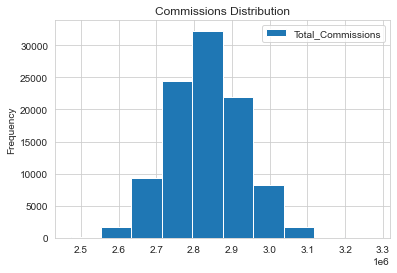

In [53]:
df.plot(kind='hist', title='Commissions Distribution')

In [54]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.831683e+06
std,9.654690e+04
min,2.472750e+06
25%,2.765750e+06
50%,2.830250e+06
75%,2.896500e+06
max,3.278500e+06
